In [163]:
import numpy as np
from MountainCarEnv import MountainCarEnv
import matplotlib.pyplot as plot

In [164]:
env = MountainCarEnv(render_mode="rbg_array")

In [165]:
pos_space = np.linspace(env.min_position, env.max_position, 8)
vel_space = np.linspace(0, env.max_speed, 5)
Q = np.zeros((len(pos_space), len(vel_space), env.action_space.n))



In [166]:
def epsilon_greedy_policy(state, Q, epsilon):
    explore = np.random.binomial(1, epsilon)
    if explore:
        action = env.action_space.sample()
    else:
        action_values = Q[state]
        action = np.argmax(action_values)
    return action

def get_state(obs):
    pos, vel = obs
    pos_bin = np.digitize(pos, pos_space)
    vel_bin = np.digitize(vel, vel_space)
    return pos_bin, vel_bin

def run_mountain_car(Q, epsilon=0.8, alpha=0.5, gamma=0.9, learn=True):
    obs = env.reset()
    done = False
    totalReward = 0
    while not done:
        state = get_state(obs)
        action = epsilon_greedy_policy(state, Q, epsilon)
        obs, reward, done, _ = env.step(action)
        totalReward += reward
        if learn:
            Q_state = Q[state[0], state[1]]
            new_state = get_state(obs)
            new_Q_state = Q[new_state[0], new_state[1]]
            Q[state[0], state[1], action] = Q_state[action] + alpha * (reward + gamma * np.max(new_Q_state) - Q_state[action])
    return totalReward



In [167]:
total_Q = []
learning_rewards = []

for i in range(100000):
    totalReward = run_mountain_car(Q)
    learning_rewards.append(totalReward)
    total_Q.append(np.mean(Q))


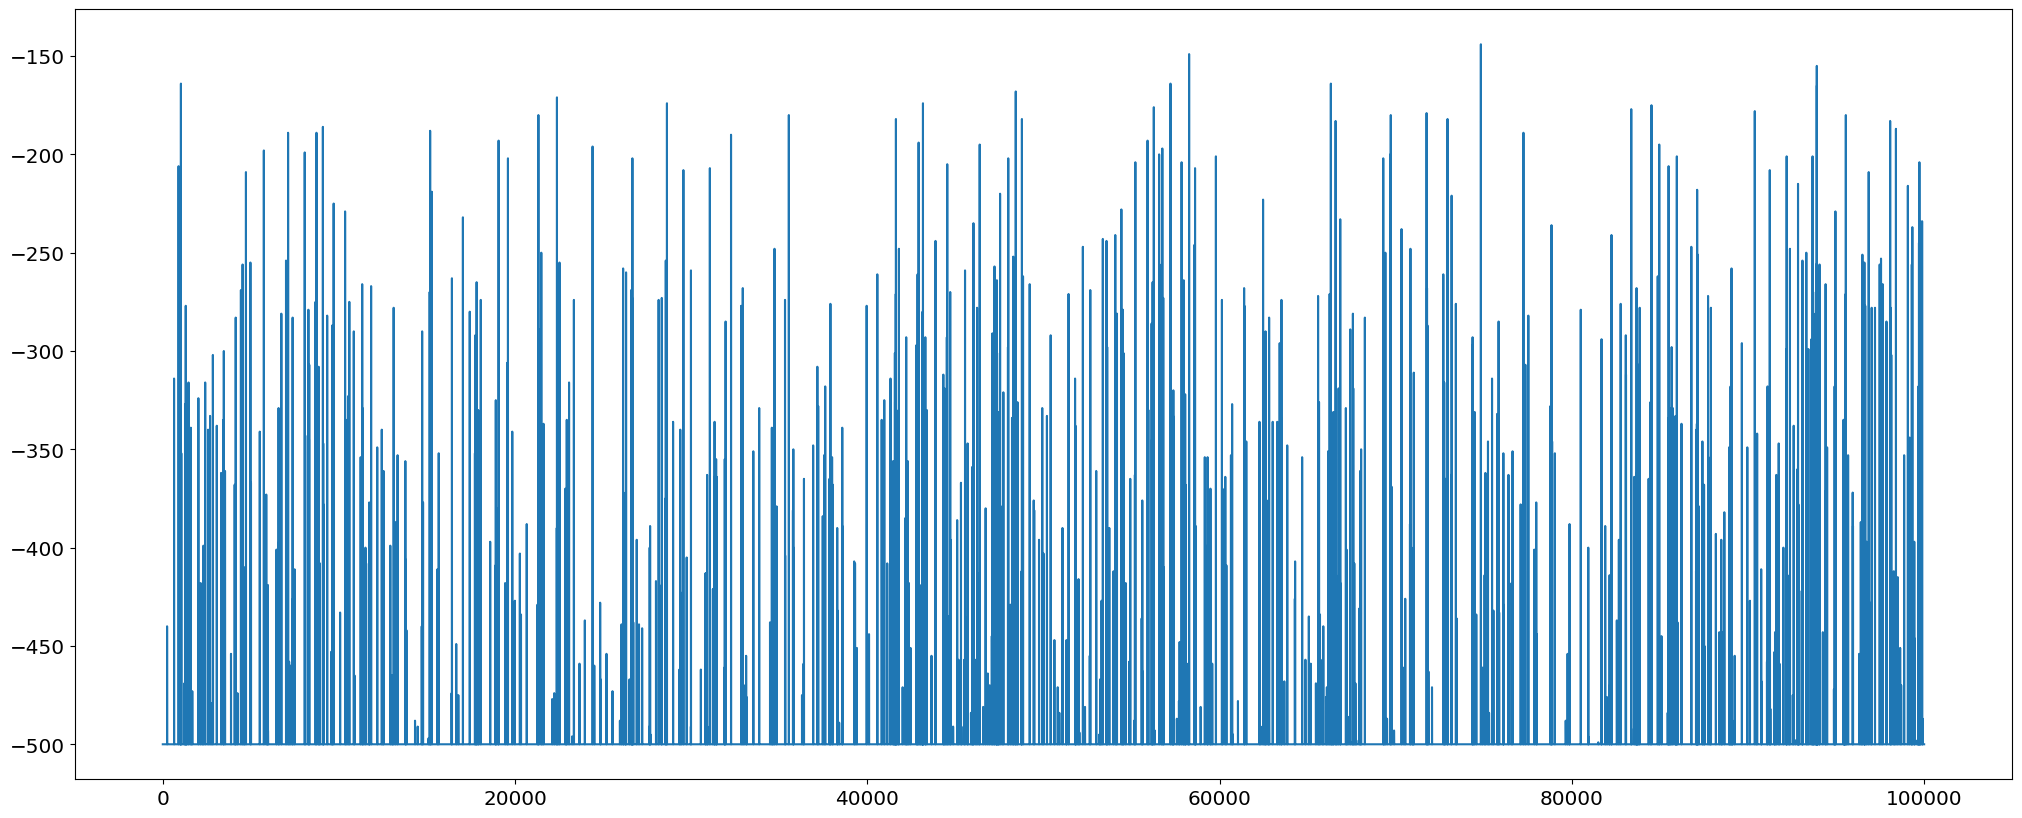

In [168]:
# Plot learing rewards
plot.plot(list(range(1, len(learning_rewards) + 1)), learning_rewards)
plot.show()

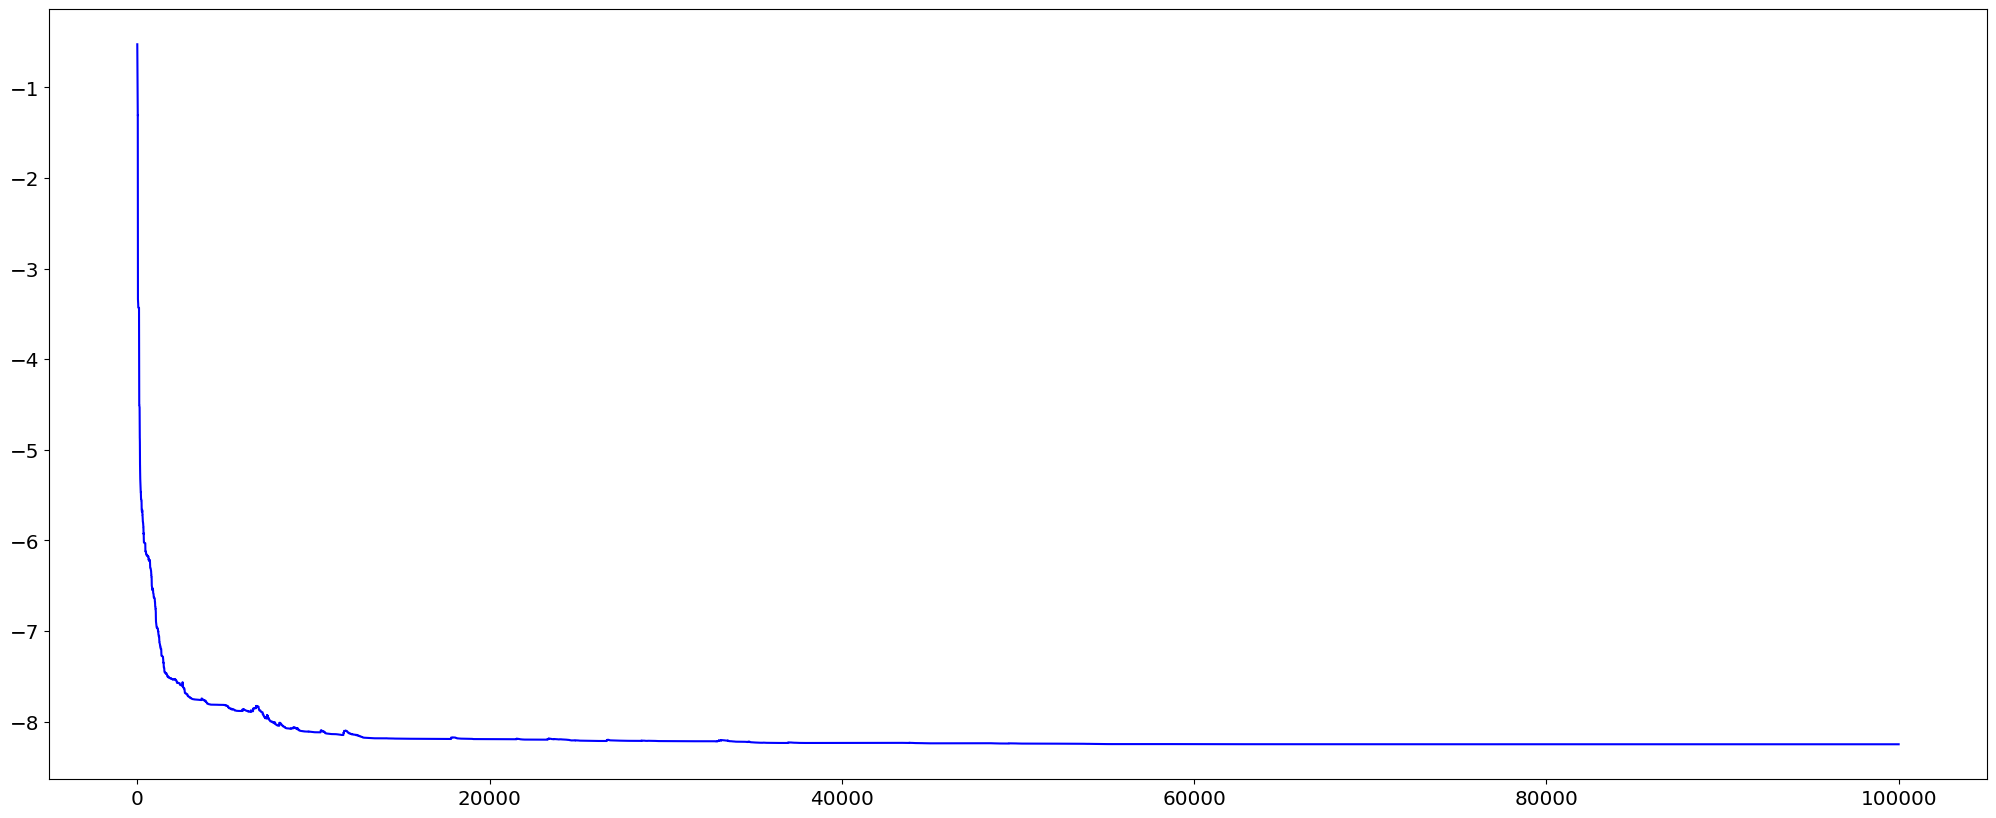

In [169]:
# Plot Q
plot.plot(list(range(1, len(total_Q) + 1)), total_Q, color='blue')
plot.show()
